# Identical to other 0_join_data notebooks, except we now just isolate Syt4 transcript hotspots we've validated.

In [1]:
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv('/tscc/nfs/home/yumei/Documents/nlp_mRNA/hotspot_analysis/deletion_effects_effects_human_water_30_nucleotides.csv')
df.head()

,transcript_id,deletion_index_start,deletion_index_end,difference,synapse_probability
0,ENST00000000233,0,30,0.000000,0.044434
1,ENST00000000233,15,45,0.000000,0.044434
2,ENST00000000233,30,60,0.000000,0.044434
3,ENST00000000233,45,75,0.000000,0.044434
4,ENST00000000233,60,90,-0.001953,0.042480


In [3]:
syt4_tx = ['ENST00000255224', 'ENST00000590752']
syt4 = df[df['transcript_id'].isin(syt4_tx)]
print(syt4.shape[0])
syt4.head()

377


,transcript_id,deletion_index_start,deletion_index_end,difference,synapse_probability
312344,ENST00000255224,0,30,-0.011719,0.699219
312345,ENST00000255224,15,45,-0.003906,0.707031
312346,ENST00000255224,30,60,0.007812,0.718750
312347,ENST00000255224,45,75,0.007812,0.718750
312348,ENST00000255224,60,90,0.023438,0.734375


<Axes: xlabel='synapse_probability', ylabel='difference'>

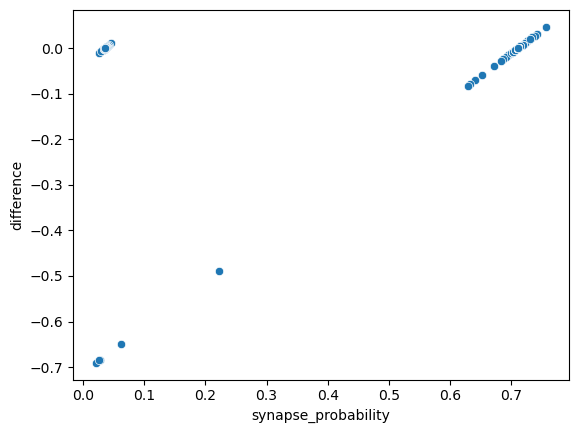

In [4]:
sns.scatterplot(data = syt4, x = 'synapse_probability', y = 'difference')

In [5]:
annotation = pd.read_csv('/tscc/nfs/home/yumei/Documents/ensembl_human_seq/Ensembl_human_mRNA_cdna_5utr_3utr.csv')
print(annotation.shape[0])
annotation.head()

274578


,trans_id,symbols_df1,gene_id_df1,gene_types,cdna sequences,cdna length,5UTR sequences,5UTR length,symbols_df2,gene_id_df2,3UTR sequences,3UTR length
0,ENST00000000233,ARF5,ENSG00000004059,protein_coding,CTGCTGCTGCTGCGCCCCATCCCCCCGCGGCCGGCCAGTTCCAGCC...,1032,CTGCTGCTGCTGCGCCCCATCCCCCCGCGGCCGGCCAGTTCCAGCC...,88,ARF5,ENSG00000004059,CCAGCCAGGGGCAGGCCCCTGATGCCCGGAAGCTCCTGCGTGCATC...,401
1,ENST00000000412,M6PR,ENSG00000003056,protein_coding,AGAGTGGGGCACAGCGAGGCGCTAGGGGGAACGCTGGCCTCTGAAA...,2450,AGAGTGGGGCACAGCGAGGCGCTAGGGGGAACGCTGGCCTCTGAAA...,159,M6PR,ENSG00000003056,ATTGCACTTTATATGTCCAGCCTCTTCCTCAGTCCCCCAAACCAAA...,1457
2,ENST00000000442,ESRRA,ENSG00000173153,protein_coding,GTCAGCTGGAGGAAGCGGAGTAGGAAGCGGCCGCGATGTCCTTTTG...,2274,GTCAGCTGGAGGAAGCGGAGTAGGAAGCGGCCGCGATGTCCTTTTG...,225,ESRRA,ENSG00000173153,GGCAAGGGGTGGGACTGGTGGGGGTTCTGGCAGGACCTGCCTAGCA...,777
3,ENST00000001008,FKBP4,ENSG00000004478,protein_coding,CCTACCCCAGCTCTCGCGCCGCGTGCAGAGGTGCTCAAGCCTCCTC...,3715,CCTACCCCAGCTCTCGCGCCGCGTGCAGAGGTGCTCAAGCCTCCTC...,170,FKBP4,ENSG00000004478,CCCCTCTCCACCAGCCCTACTCCTGCGGCTGCCTGCCCCCCAGTCT...,2165
4,ENST00000001146,CYP26B1,ENSG00000003137,protein_coding,ACAGCCAATCCCCCGAGCGGCCGCCAACATGCTCTTTGAGGGCTTG...,4556,ACAGCCAATCCCCCGAGCGGCCGCCAAC,28,CYP26B1,ENSG00000003137,CCCAAGACCCACCCGCCTCAGCCCAGCCCAGGCAGCGGGGTGGTGG...,2989


In [6]:
ranges = annotation.set_index('trans_id')[['5UTR length', 'cdna length','3UTR length']]

In [7]:
ranges['cdna_end'] = ranges['cdna length']-ranges['3UTR length']

In [8]:
ranges.head()

,5UTR length,cdna length,3UTR length,cdna_end
trans_id,,,,
ENST00000000233,88,1032,401,631
ENST00000000412,159,2450,1457,993
ENST00000000442,225,2274,777,1497
ENST00000001008,170,3715,2165,1550
ENST00000001146,28,4556,2989,1567


In [9]:
(ranges['cdna_end']-ranges['5UTR length'])%3

trans_id
ENST00000000233    0
ENST00000000412    0
ENST00000000442    0
ENST00000001008    0
ENST00000001146    0
                  ..
ENST00000707134    0
ENST00000707135    0
ENST00000707136    1
ENST00000707137    1
ENST00000707138    1
Length: 274578, dtype: int64

# label if the df on what regions they are in

In [10]:
syt4 = syt4.merge(ranges, left_on = 'transcript_id', right_index = True)
syt4.head()

,transcript_id,deletion_index_start,deletion_index_end,difference,synapse_probability,5UTR length,cdna length,3UTR length,cdna_end
312344,ENST00000255224,0,30,-0.011719,0.699219,209,3936,2449,1487
312345,ENST00000255224,15,45,-0.003906,0.707031,209,3936,2449,1487
312346,ENST00000255224,30,60,0.007812,0.718750,209,3936,2449,1487
312347,ENST00000255224,45,75,0.007812,0.718750,209,3936,2449,1487
312348,ENST00000255224,60,90,0.023438,0.734375,209,3936,2449,1487


In [11]:
def return_annotation(row, col):
    if row[col]<= row['5UTR length']:
        return 'UTR5'
    else:
        if row[col]<=row['cdna_end']:
            return 'CDS'
        else:
            return 'UTR3'


In [12]:
syt4['start_annotation']=syt4.apply(lambda row: return_annotation(row, 'deletion_index_start'), axis = 1)
syt4['end_annotation']=syt4.apply(lambda row: return_annotation(row, 'deletion_index_end'), axis = 1)

In [13]:
pd.crosstab(syt4['start_annotation'], syt4['end_annotation'])

end_annotation,CDS,UTR3,UTR5
start_annotation,,,
CDS,164,4,0
UTR3,0,181,0
UTR5,4,0,24


In [14]:
from pathlib import Path
outdir = Path('/tscc/nfs/home/bay001/projects/karen_synapse_20240529/permanent_data/charlene_work')

In [15]:
syt4['sequence']=syt4['transcript_id'].map(annotation.set_index('trans_id')['cdna sequences'])

In [16]:
syt4['subseq']= syt4.apply(
    lambda row: row['sequence'][row['deletion_index_start']:row['deletion_index_end']],
    axis = 1
)
syt4

,transcript_id,deletion_index_start,deletion_index_end,difference,synapse_probability,5UTR length,cdna length,3UTR length,cdna_end,start_annotation,end_annotation,sequence,subseq
312344,ENST00000255224,0,30,-0.011719,0.699219,209,3936,2449,1487,UTR5,UTR5,AGAAGAGCCAAAACAGGAACCGAGGTGGCAAATCACTGTGCGAGGG...,AGAAGAGCCAAAACAGGAACCGAGGTGGCA
312345,ENST00000255224,15,45,-0.003906,0.707031,209,3936,2449,1487,UTR5,UTR5,AGAAGAGCCAAAACAGGAACCGAGGTGGCAAATCACTGTGCGAGGG...,GGAACCGAGGTGGCAAATCACTGTGCGAGG
312346,ENST00000255224,30,60,0.007812,0.718750,209,3936,2449,1487,UTR5,UTR5,AGAAGAGCCAAAACAGGAACCGAGGTGGCAAATCACTGTGCGAGGG...,AATCACTGTGCGAGGGCGAGTGGACCTCCC
312347,ENST00000255224,45,75,0.007812,0.718750,209,3936,2449,1487,UTR5,UTR5,AGAAGAGCCAAAACAGGAACCGAGGTGGCAAATCACTGTGCGAGGG...,GCGAGTGGACCTCCCTCTTTGCCTCCTCCC
312348,ENST00000255224,60,90,0.023438,0.734375,209,3936,2449,1487,UTR5,UTR5,AGAAGAGCCAAAACAGGAACCGAGGTGGCAAATCACTGTGCGAGGG...,TCTTTGCCTCCTCCCTGTTCCAGGAGCTGG
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5353264,ENST00000590752,1665,1695,0.000244,0.036377,209,1765,332,1433,UTR3,UTR3,AGAAGAGCCAAAACAGGAACCGAGGTGGCAAATCACTGTGCGAGGG...,TCAGATTACCAGTGATATAACTAGGAATAG
5353265,ENST00000590752,1680,1710,0.000244,0.036377,209,1765,332,1433,UTR3,UTR3,AGAAGAGCCAAAACAGGAACCGAGGTGGCAAATCACTGTGCGAGGG...,TATAACTAGGAATAGTCAGACATTTTATGA
5353266,ENST00000590752,1695,1725,0.000244,0.036377,209,1765,332,1433,UTR3,UTR3,AGAAGAGCCAAAACAGGAACCGAGGTGGCAAATCACTGTGCGAGGG...,TCAGACATTTTATGAATACTGTGCCAGAAT
5353267,ENST00000590752,1710,1740,0.000244,0.036377,209,1765,332,1433,UTR3,UTR3,AGAAGAGCCAAAACAGGAACCGAGGTGGCAAATCACTGTGCGAGGG...,ATACTGTGCCAGAATCCCAAATTATAAATG


# Isolate hotspots using the difference between the wt and mut files
- `/tscc/nfs/home/yumei/Documents/nlp_mRNA/hotspot_analysis/human_syt4.fasta`
- `/tscc/nfs/home/yumei/Documents/nlp_mRNA/hotspot_analysis/human_syt4_mut.fasta`

In [17]:
hotspots_of_interest = ['TTGATGAAATCCCCACAGTGGTGGGGATCT', 'TCAGTGCATTTGGCCTGGTCTTCACAGTCT', 'CTCTCTTTGCATGGATCTGCTGTCAGAGAA']
hotspots = syt4[syt4['subseq'].isin(hotspots_of_interest)]
hotspots

,transcript_id,deletion_index_start,deletion_index_end,difference,synapse_probability,5UTR length,cdna length,3UTR length,cdna_end,start_annotation,end_annotation,sequence,subseq
312360,ENST00000255224,240,270,-0.488281,0.222656,209,3936,2449,1487,CDS,CDS,AGAAGAGCCAAAACAGGAACCGAGGTGGCAAATCACTGTGCGAGGG...,TTGATGAAATCCCCACAGTGGTGGGGATCT
312362,ENST00000255224,270,300,-0.683716,0.027222,209,3936,2449,1487,CDS,CDS,AGAAGAGCCAAAACAGGAACCGAGGTGGCAAATCACTGTGCGAGGG...,TCAGTGCATTTGGCCTGGTCTTCACAGTCT
312364,ENST00000255224,300,330,-0.684937,0.026001,209,3936,2449,1487,CDS,CDS,AGAAGAGCCAAAACAGGAACCGAGGTGGCAAATCACTGTGCGAGGG...,CTCTCTTTGCATGGATCTGCTGTCAGAGAA


In [21]:
hotspots.index = ['tile1', 'tile2', 'tile3']
hotspots

,transcript_id,deletion_index_start,deletion_index_end,difference,synapse_probability,5UTR length,cdna length,3UTR length,cdna_end,start_annotation,end_annotation,sequence,subseq
tile1,ENST00000255224,240,270,-0.488281,0.222656,209,3936,2449,1487,CDS,CDS,AGAAGAGCCAAAACAGGAACCGAGGTGGCAAATCACTGTGCGAGGG...,TTGATGAAATCCCCACAGTGGTGGGGATCT
tile2,ENST00000255224,270,300,-0.683716,0.027222,209,3936,2449,1487,CDS,CDS,AGAAGAGCCAAAACAGGAACCGAGGTGGCAAATCACTGTGCGAGGG...,TCAGTGCATTTGGCCTGGTCTTCACAGTCT
tile3,ENST00000255224,300,330,-0.684937,0.026001,209,3936,2449,1487,CDS,CDS,AGAAGAGCCAAAACAGGAACCGAGGTGGCAAATCACTGTGCGAGGG...,CTCTCTTTGCATGGATCTGCTGTCAGAGAA


In [22]:
reformatted = hotspots[['transcript_id', 'deletion_index_start', 'deletion_index_end','difference',
    'synapse_probability','start_annotation','end_annotation','subseq']]

reformatted.to_csv(outdir / 'syt4_hotspots_30bp.csv.gz', compression='gzip')